In [1]:
'''
Tasks:

-- Date preprocessing -- 
    converting dates between languages, and then structure
    --> alternatively, we can duplicate the set, change weird dates to none
    
--feature creation--
    date by year
    looking at if they are posting weekday/weekend might suggest that they are working age
    language (foreign in general or specifics)
    number of posts per user.id
    
-- text --
    remove the stopwords
        NLTK
    remove the punctuation
    stemming the words
    SVD (singular value decomposition) --> will show what is most important by 
        taking the matrix of term counts (needs to be created), but returns importance values ~ variability with each word
    TF-IDF: could filter down to top 500-1000 words (we can probably just implement using a package) 
        if not...
        calculate the frequency of word in every document
        inverse log 
        
-- train model: multiple linear regression --
    glm net --> just make sure not to do log, but can still use this for normal parametric
        (generalization of ridge and lasso regression)
    
    CV procedure to judge accuracy of predictor based on words we keep or parameters of the linear model

    
general notes: what is a document?

    post?
        -this would let us use the distribution of predictions for a user to do a second layer to the model
        -potentially average/take median of different predictions for individual documents
        
        -might want to consider the number of unique pairings between user.id and post.id
        
    single user?
    
    bigrams or trigrams instead of words (two or three words in order can be treated as words)
        n words in sentence --> n-1 bigrams --> blows up dimensionality, but could give more information because context
        comes into play (may or may not be feasible depending on our corpus)
        
        
Note from Sean: We may want to use the "gensim" package, which is Google's pre-trained word2vec model, which I think could be really useful.

'''
;

''

In [52]:
import os
import numpy as np
import pandas as pd
import sklearn as slr
import nltk
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Set wd
os.chdir("C://Users/alxgr//Documents//UVA//DSI//Fall 2018//SYS//Kaggle Competition 3//sys6018-competition-blogger-characteristics//data")
# os.chdir("/Users/SM/DSI/classes/fall2018/SYS6018/kaggle/sys6018-competition-blogger-characteristics/")

In [4]:
# read in data
# train = pd.read_csv(os.path.join("data", "input", "train.csv"))
# test = pd.read_csv(os.path.join("data", "input", "test.csv"))

# (os.path did not work for alex.  below for wd on alex's pc)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# join data sets
test['age'] = None
train['set'] = "train"
test['set'] = "test"
# train.shape
# test.shape

In [6]:
alldata = pd.concat([train, test])
# alldata.shape

In [7]:
alldata.isnull().sum()

post.id         0
user.id         0
gender          0
topic           0
sign            0
date            0
text            0
age        238323
set             0
dtype: int64

In [8]:
# Experimenting with the dateparser package
alldata["date_parsed"] = None
# alldata.date_parsed
alldata.head()

,post.id,user.id,gender,topic,sign,date,text,age,set,date_parsed
0,1,11869,male,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",15,train,None
1,2,11869,male,Student,Leo,"13,May,2004",These are the team members: Drewe...,15,train,None
2,3,11869,male,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,15,train,None
3,4,11869,male,Student,Leo,"12,May,2004",testing!!! testing!!!,15,train,None
4,5,16332,male,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,33,train,None


In [9]:
import dateparser

# print(str(alldata.date[0]))
# print(dateparser.parse(str(alldata.date[0])))

# train["date"][0]

# for i in range(0,len(alldata)):
#     alldata.date_parsed[i] = dateparser.parse(str(alldata.date[i]))

^^ the issue here is that the objects being passed in at each index are actually 2 objects...?!

where is the second one coming from?

I think when we combined training and observation, there are two indices with value of 0!

In [10]:
# print(alldata.set[0]) # confirmed, indices need to be reset in the "all" data set
alldata.reset_index(inplace=True)


In [11]:
# print(alldata.date[0]) # confirmed, the index now only returns one value per index

for i in range(0,len(alldata)):
#     alldata.date_parsed[i] = dateparser.parse(str(alldata.date[i])) # produces SettingWithCopyWarning
    alldata.loc[i,('data_parsed')] = dateparser.parse(str(alldata.date[i]))
    

KeyboardInterrupt: 

In [12]:
alldata.head() # it works thank the lord

,index,post.id,user.id,gender,topic,sign,date,text,age,set,date_parsed,data_parsed
0,0,1,11869,male,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",15,train,None,2004-05-14
1,1,2,11869,male,Student,Leo,"13,May,2004",These are the team members: Drewe...,15,train,None,2004-05-13
2,2,3,11869,male,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,15,train,None,2004-05-12
3,3,4,11869,male,Student,Leo,"12,May,2004",testing!!! testing!!!,15,train,None,2004-05-12
4,4,5,16332,male,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,33,train,None,2004-06-11


In [13]:
# convert to datetime, leaving non-valid/non-English dates null
alldata['date_date'] = pd.to_datetime(alldata.date, errors='coerce')

KeyboardInterrupt: 

# Exploratory Analysis:

sum the number of post id's per user compared with their age

take the average age per each topic

topics of posts without english dates



In [74]:
idfreq = train.groupby(['user.id']).agg({'post.id':[len], 'age':[max]})
idfreq.columns = idfreq.columns.droplevel(1)
idfreq

idfreq.columns= ["Post Freq", "Age"]
# freqtable

# idfreq.columns


Index(['Post Freq', 'Age'], dtype='object')

(0, 50)

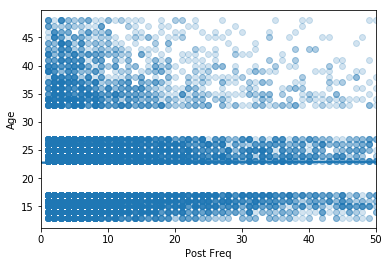

In [75]:
sns.regplot(x='Post Freq', y='Age', data=idfreq, scatter_kws={'alpha':0.2})
plt.xlim(0, 50)

(0, 500)

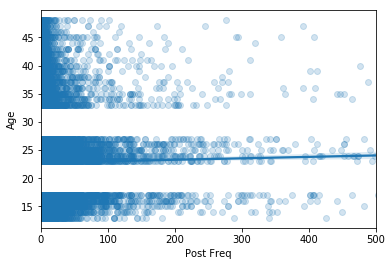

In [77]:
sns.regplot(x='Post Freq', y='Age', data=idfreq, scatter_kws={'alpha':0.2})
plt.xlim(0, 500)

In [61]:
age_per_topic = train.groupby(['topic']).agg({"age" : [np.mean]})
age_per_topic

,age
,mean
topic,
Accounting,26.083295
Advertising,29.439648
Agriculture,23.610108
Architecture,25.633061
Arts,24.693826
Automotive,28.759259
Banking,26.036380
Biotech,23.045685


In [62]:
train.age.mean()

23.54059386718018

In [ ]:
# I would recommend removing NA's this way -- it is much easier.
alldata.dropna(inplace = True) 
print(train.shape,"\n",alldata.shape)

In [ ]:
# dummy variables:

'''
Gender
Topic
Sign
~Date (depending on how we encode it)
'''


In [ ]:
training_corrected = alldata[alldata.set == 'train']
testing_corrected = alldata[alldata.set == 'test']

In [ ]:
# alldata.set
training_corrected.head
# testing_corrected.head

In [ ]:
# Cross Validation (did not do the complicated ones we talked about in class)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

# http://scikit-learn.org/stable/modules/cross_validation.html <-- I saw we imported this, but couldn't figure out sklearn

cv_train = training_corrected.sample(frac=.75,random_state=42)
training_posts = cv_train["post.id"]

# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

cs_val = training_corrected.loc[~training_corrected['post.id'].isin(training_posts)]

# note: tilda negates like a - sign would in R

print(cv_train.shape)
print(cs_val.shape)